In [21]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.pretty_print import pretty_cpt

from IPython.display import display, Math, Latex

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

# Exercice 5 : détection de fraude à la carte de crédit
> from Roland Donat

Chaque année, les banques perdent d'importantes sommes d'argents suite aux pertes ou aux vols de cartes de crédit. Pour détecter l'occurrence de fraudes, l'industrie financière se tourne de plus en plus vers l'intelligence artificielle et l'analyse de données pour trouver des solutions à cette problématique. En effet, les propriétaires de carte de crédit ont tendance à faire leurs achats en suivant des schémas plus ou moins identifiables. Quand ce schéma n'est plus respecté, il y a de fortes chances qu'une fraude se soit produite. Les paragraphes suivants donnent des informations générales sur le comportement des propriétaires de carte :

+ Quand un propriétaire de carte de crédit voyage à l'étranger, les transactions frauduleuses sont plus probables car les touristes sont des cibles privilégiées pour les voleurs. Plus précisément, on estime que $1\%$ des transactions sont frauduleuses quand le propriétaire de la carte de crédit est en voyage, contre seulement $0.2\%$ de transactions frauduleuses à domicile. En moyenne, $5\%$ de toutes les transactions se produisent au cours de voyages à l'étranger.
+ Si une transaction est frauduleuse, alors la probabilité qu'il s'agisse d'un achat à l'étranger augmente, sauf si le propriétaire de la carte est précisément en voyage à l'étranger. Statistiquement, quand le propriétaire de la carte n'est pas en voyage, $10\%$ des transactions frauduleuse concernent un achat à l'étranger alors que seulement 1% des transactions normales portent sur un achat à l'étranger. En revanche, quand le propriétaire est en voyage à l'étranger, $90\%$ des transactions (frauduleuses ou non) sont des achats à l'étranger.
+ Les achats réalisés sur internet sont plus souvent frauduleux. Ceci est particulièrement vrai pour les propriétaires de carte n'ayant pas d'ordinateur. En effet :
    + Pour ceux qui ne possèdent pas d'ordinateur, seulement $0.1\%$ de leurs transactions normales sont faites sur internet. Ce chiffre monte à $1.1\%$ en cas de transactions frauduleuses. 
    + Pour les possesseurs d'ordinateur, $1\%$ des transactions normales a lieu sur internet. En revanche, ce pourcentage s'élève à $2\%$ lors de transactions frauduleuses.
    + On estime aujourd'hui que $75\%$ de la population possède un ordinateur
+ Malheureusement, les banques ne savent pas si le propriétaire d'une carte possède un ordinateur. Toutefois, ces dernières peuvent vérifier l'historique des transactions afin de rechercher si des achats liés à du matériel informatique ont été effectués dernièrement. En particulier, on estime que $10\%$ des propriétaires d'ordinateur ont fait des achats en rapport avec l'informatique dernièrement contre $0.1\%$ pour ceux ne possédant pas d'ordinateur.


Construire un BN (graphe et TPC) visant à détecter des transactions frauduleuses. Le BN sera composé des 6 variables booléennes suivantes :

    FR : la transaction courante est frauduleuse.
    VE : le propriétaire de la carte est actuellement en voyage à l'étranger.
    AE : la transaction courante concerne un achat à l'étranger.
    AI : la transaction courante concerne un achat sur internet.
    PO : le propriétaire de la carte a un ordinateur.
    AOD : un achat lié à l'informatique a été effectué dernièrement.


In [22]:
bn = gum.BayesNet()
# définition des variables
fr = bn.add(gum.LabelizedVariable("FR","",0).addLabel("O").addLabel("N")) 
ve = bn.add(gum.LabelizedVariable("VE","",0).addLabel("O").addLabel("N"))
ae = bn.add(gum.LabelizedVariable("AE","",0).addLabel("O").addLabel("N"))
ai = bn.add(gum.LabelizedVariable("AI","",0).addLabel("O").addLabel("N"))
po = bn.add(gum.LabelizedVariable("PO","",0).addLabel("O").addLabel("N")) 
aod = bn.add(gum.LabelizedVariable("AOD","",0).addLabel("O").addLabel("N"))  

# définition des arcs
bn.addArc(ve,fr)

bn.addArc(ve,ae)
bn.addArc(fr,ae)

bn.addArc(po,ai)
bn.addArc(fr,ai)

bn.addArc(po,aod)

gnb.showBN(bn)

bn.cpt(ve).fillWith([0.05,0.95])
bn.cpt(po).fillWith([0.75,0.25])

bn.cpt(fr)[{"VE":"O"}] = [0.01,0.99]
bn.cpt(fr)[{"VE":"N"}] = [0.002,0.998]
                          
bn.cpt(ae)[{"VE":"N","FR":"O"}] = [0.1,0.9]
bn.cpt(ae)[{"VE":"N","FR":"N"}] = [0.01,0.99]
bn.cpt(ae)[{"VE":"O","FR":"O"}] = [0.9,0.1]
bn.cpt(ae)[{"VE":"O","FR":"N"}] = [0.9,0.1]

bn.cpt(ai)[{"PO":"N","FR":"N"}] = [0.001,0.999]
bn.cpt(ai)[{"PO":"N","FR":"O"}] = [0.011,0.989]
bn.cpt(ai)[{"PO":"O","FR":"N"}] = [0.01,0.99]
bn.cpt(ai)[{"PO":"O","FR":"O"}] = [0.02,0.98]

bn.cpt(aod)[{"PO":"O"}] = [0.1,0.9]
bn.cpt(aod)[{"PO":"N"}] = [0.001,0.999]

## Inférence

Quelle est la probabilité a priori qu'une transaction soit frauduleuse?

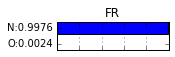

In [23]:
ie = gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior(fr))


## Première optimisation

Supposons à présent que vous ayez volé une carte de crédit - attention c'est mal ! -. Supposons de plus que vous connaissez les réseaux bayésiens et que vous savez que la banque du propriétaire de la carte utilise le système de détection de fraudes reposant sur le RB décrit précédemment. Malgré tout cela, vous souhaitez quand même faire un achat sur internet avec la carte volée, quelle(s) action(s) pouvez vous effectuer afin de réduire le risque que votre transaction soit rejetée? De combien pouvez vous faire baisser la probabilité que la transaction soit considérée comme frauduleuse ?

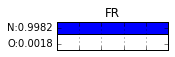

In [38]:
ie.setEvidence({"AE":"N","VE":"N"})
ie.makeInference()
gnb.showProba(ie.posterior(fr))

=> ne pas partir en voyage et ne pas faire d'achat à l'étranger fait legèrement baisser la probabilité